In [1]:
%load_ext autoreload
%autoreload 2

from PIL import Image
from scipy.misc import toimage
from scipy.misc import imshow
 
import numpy as np
from numpy import genfromtxt
from trueskill import TrueSkill, Rating, quality_1vs1, rate_1vs1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
from matplotlib import cm
import matplotlib.image as mpimg
from scipy import stats
import operator as op
import pandas as pd
from ast import literal_eval
from mpl_toolkits.mplot3d import Axes3D
import math
import sys


import mygabasic as ga
 
%aimport mygabasic

HOlA MYGABASIC


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]


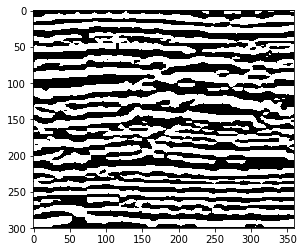

In [2]:

imgeoOrg = mpimg.imread('geo2Org.png')
imgeo = mpimg.imread('geo2.png').astype(np.uint8)
# imgplot = plt.imshow(imgeo1)
print(imgeo[1])
#black 0
#white 1
b = imgeo < 1
c = b.astype(np.uint8)
gray = plt.imshow(imgeo, cmap='gray', interpolation='none')

plt.show()


In [3]:
def waveCostFromBinary(imgeo, binaryString, codeLen):
    obj = sinGraph(50, 5, 2, 0, binaryString, codeLen)
    costOby = waveCost(imgeo,obj["wImgArr"])
    obj["type"] = costOby["type"]
    obj["cost"] = costOby["cost"]
    obj["index"] = costOby["index"]
    obj["gopp"] = None
    
    return obj
    
def waveCost(imgeo,imgWave):
    endFlag = False
    scanIndex = 0
    cost = 0
    bestCostIndex = 0
    baseImgLen = imgeo.shape[0]
    waveImgLen = imgWave.shape[0]
    waveType = ""
    if waveImgLen <= baseImgLen:
        waveType = "Short"
        while(endFlag == False):
            imgDiff = imgWave - imgeo[scanIndex:(waveImgLen + scanIndex)]
            mask = imgDiff != 0
            binMask = mask.astype(int)
            tmpCost = np.count_nonzero(binMask == 0)
            if tmpCost > cost:
                cost = tmpCost
                bestCostIndex = scanIndex
            scanIndex = scanIndex + 1
            if (waveImgLen + scanIndex) > baseImgLen:
                endFlag =  True
    else:
        waveType = "Extended"
        while(endFlag == False):
            imgDiff = imgWave[scanIndex:(baseImgLen + scanIndex)] - imgeo
            mask = imgDiff != 0
            binMask = mask.astype(int)
            tmpCost = np.count_nonzero(binMask == 0)
            if tmpCost > cost:
                cost = tmpCost
                bestCostIndex = scanIndex
            scanIndex = scanIndex + 1
            if (baseImgLen + scanIndex) > waveImgLen:
                endFlag =  True
    # for example a detected wave at index 26
    overlap = 0
    overlapP = 0
    if (bestCostIndex <= 26) and  ((bestCostIndex + waveImgLen) >= (26 + (6*2))):
        overlap = (6*2)
    elif (bestCostIndex >= 26) and  ((bestCostIndex + waveImgLen) <= (26 + (6*2))):
        overlap = waveImgLen
    elif (bestCostIndex <= 26) and  ((bestCostIndex + waveImgLen) <= (26 + (6*2))):
        # star index is into already detected  wave
        overlap =  26 - (bestCostIndex + waveImgLen)
    elif (bestCostIndex >= 26) and  ((bestCostIndex + waveImgLen) >= (26 + (6*2))):
        # star index is into already detected  wave
        overlap =  bestCostIndex - (26 + (6*2))
    
    overlapP = abs((overlap/waveImgLen)*100 - (overlap/26)*100)
        
    return {"type":waveType, "cost":cost, "index":bestCostIndex}

def sinGraph(aMax, aMin, agMax, agMin, indivudual, codeLen):
    splitIndv = indivudual.reshape((-1,codeLen))
    aVal = ga.gdeco(bitlist = splitIndv[0], minVal = aMin, maxVal = aMax, codeLen = codeLen)
    agVal = ga.gdeco(bitlist = splitIndv[1], minVal = agMin, maxVal = agMax, codeLen = codeLen)
    fqVal = 1
    
    x = (np.linspace(0, 359, 360)*np.pi)/180
    s = aVal*np.sin(x*fqVal + np.pi*agVal)
    sMin = np.amin(s)
    sMax = np.amax(s)
    rank = int(sMax - sMin)
    
    # build wave image array
    # wImgArr = np.ones((int(aVal*2 + 1),360)).astype(np.uint8)
    wImgArr = np.ones(((rank + 1),360)).astype(np.uint8)*2
    for i in range(360):
        """
         if int(sMax - s[i] - 1) >= 0:
            wImgArr[int(sMax - s[i] - 1)][i] = 0
        """
       
        wImgArr[int(sMax - s[i])][i] = 0
        """
        if int(sMax - s[i] + 1) <= rank:
            wImgArr[int(sMax - s[i] + 1)][i] = 0
        """
        
       
    
    return {"aVal":aVal,
            "fqVal":fqVal,
            "agVal":agVal,
            "x":x,
            "s":s,
            "sMin":sMin,
            "sMax":sMax,
            "wImgArr":wImgArr,
            "indivudual":indivudual,
            "type":"",
            "cost":0,
            "index":0,
            "gopp":None}
    
    
    

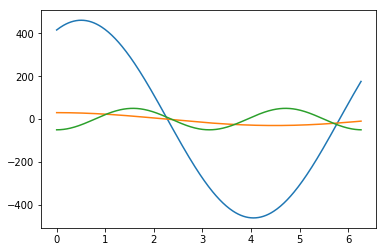

In [4]:
x = (np.linspace(0, 359, 360)*np.pi)/180
# Amplitude Range [1,600]
# Frequency [0.7,1.2]
# Angle [0,2]
plt.plot(x, 460.6446402685588*np.sin(x*0.8858854047455558 + np.pi*0.35753414206149386) )
plt.plot(x, 30*np.sin(x*0.7 + np.pi/2) )
plt.plot(x, 50*np.sin(x*2 - np.pi/2) )
plt.show()

 Iteration 499

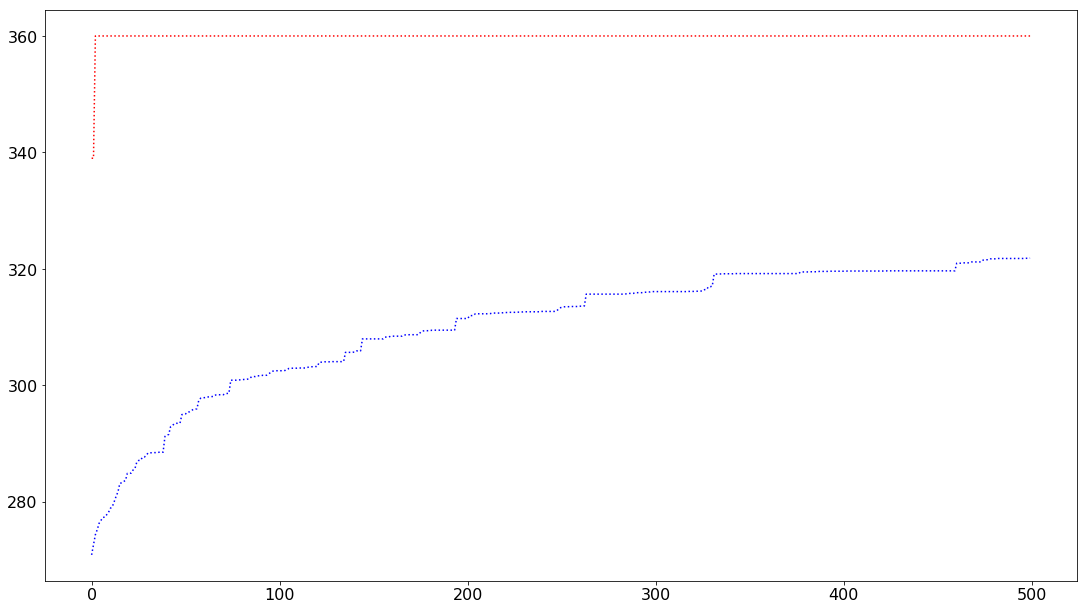

In [5]:
N = 32
codeLen = 16
genQty = 2
d = codeLen * genQty
iterations = 500
matingPercent = 0.7
mutaPercent = 1/d
# Not used
lnrate = 1
# Initial population
Pop = ga.pgenerator(N=N,d=d)
gopp = ga.pgenerator4Gop(N=N,d = 3)
imgsMtxLst = []

# Evolving output matrix
OUT_Matrix = np.zeros((5, iterations))
GOP_Matrix = np.zeros((3, iterations))
Iterations = []

# Population type, cost and index workout
for i in range(N):
    obj = sinGraph(50, 5, 2, 0, Pop[i], codeLen)
    costOby = waveCost(imgeo,obj["wImgArr"])
    obj["type"] = costOby["type"]
    obj["cost"] = costOby["cost"]
    obj["index"] = costOby["index"]
    obj["gopp"] = gopp[i]
    imgsMtxLst.append(obj)
    
pselect = ga.randomUniformSelection4Geological(imgsMtxLst, N)
children = ga.childenGen_MultyM_haeaMax4Geological(imgsMtxLst, 
                                                   pselect, 
                                                   d, 
                                                   imgeo, 
                                                   codeLen, 
                                                   waveCostFromBinary,
                                                   mutaPercent,
                                                   lnrate)

for j in range(iterations):
    sys.stdout.write("\r Iteration " + str(j))
    sys.stdout.flush()
    Iterations.append(j)
    pselect = ga.randomUniformSelection4Geological(children, N)
    children = ga.childenGen_MultyM_haeaMax4Geological(children, 
                                                       pselect, 
                                                       d, 
                                                       imgeo, 
                                                       codeLen, 
                                                       waveCostFromBinary,
                                                       mutaPercent,
                                                       lnrate)
    
    OUT_Matrix[0][j] = np.mean([idv["cost"] for idv in children])
    OUT_Matrix[2][j] = np.max([idv["cost"] for idv in children])

    

    # multy curve plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[0]),
         'b:',
         np.squeeze(Iterations),
         np.squeeze(OUT_Matrix[2]),
         'r:')

plt.show()



Short
cost 360
Am 6.067406729228656
Fq 1
Ag 1.8095826657511254
index 26
wImgArr 13 360


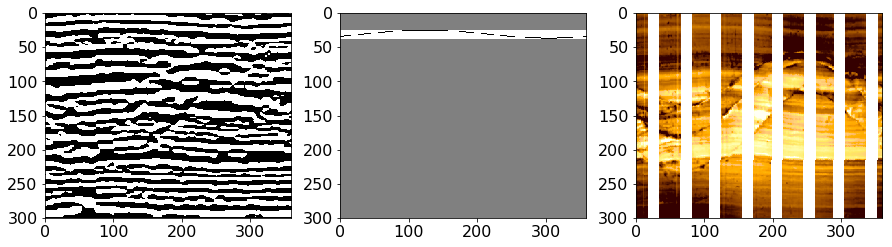

Short
cost 360
Am 5.035362783245594
Fq 1
Ag 1.760387579156176
index 26
wImgArr 11 360


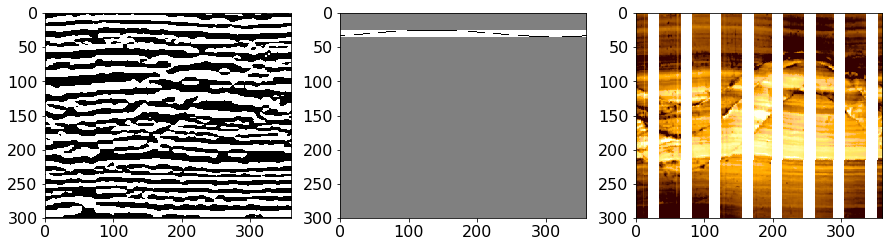

Short
cost 360
Am 6.123712520027466
Fq 1
Ag 1.9470359349965667
index 26
wImgArr 13 360


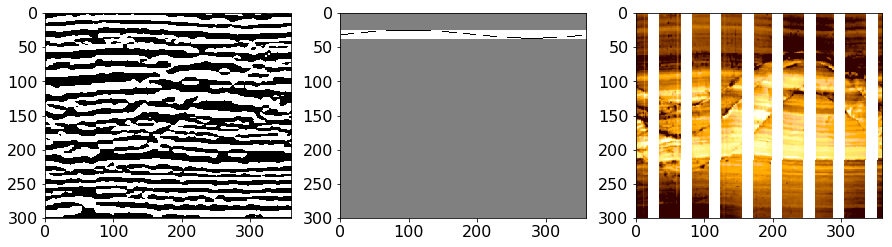

Short
cost 360
Am 5.902609292744335
Fq 1
Ag 1.8410772869459067
index 26
wImgArr 12 360


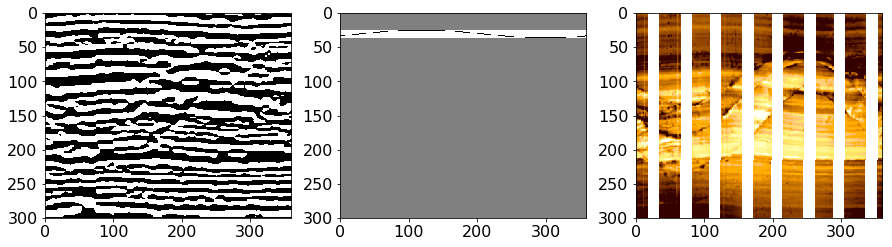

Short
cost 360
Am 5.38693064774548
Fq 1
Ag 1.8556343938353552
index 26
wImgArr 11 360


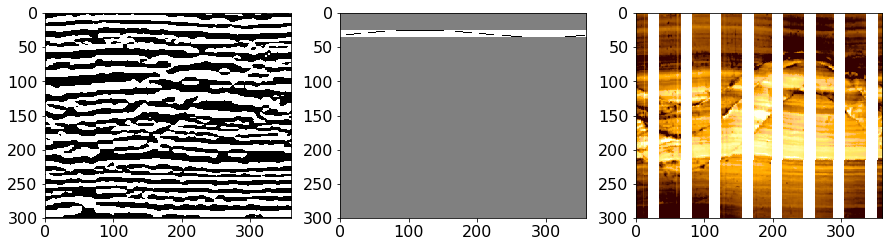

Short
cost 360
Am 5.035362783245594
Fq 1
Ag 1.8744640268558785
index 26
wImgArr 11 360


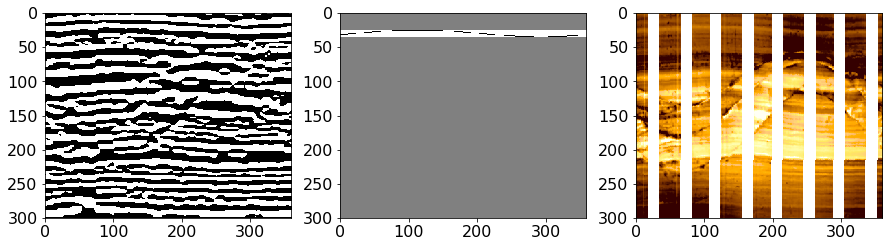

Short
cost 360
Am 6.565918974593728
Fq 1
Ag 1.8408331425955595
index 25
wImgArr 14 360


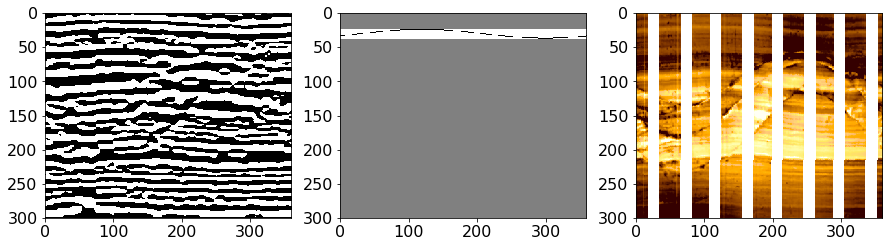

Short
cost 360
Am 5.035362783245594
Fq 1
Ag 1.81196307316701
index 26
wImgArr 11 360


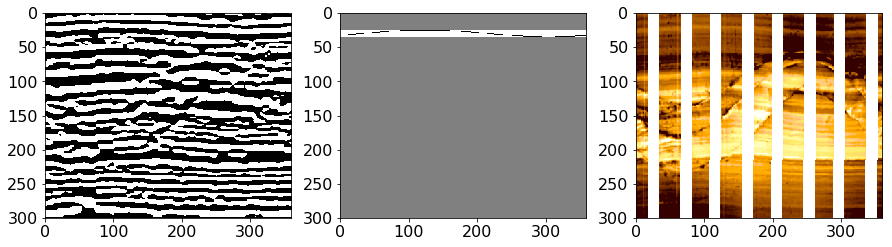

Short
cost 360
Am 5.0346761272602425
Fq 1
Ag 1.9370260166323339
index 26
wImgArr 11 360


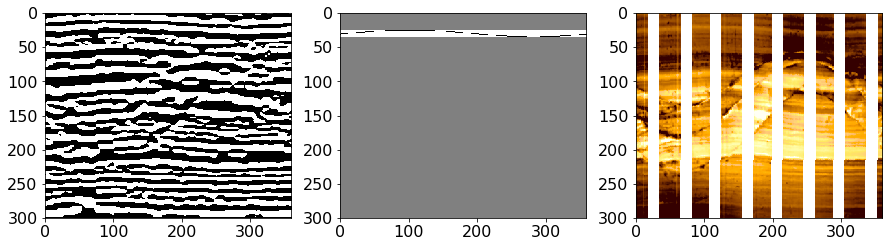

Short
cost 360
Am 5.3635843442435345
Fq 1
Ag 1.7614557106889448
index 26
wImgArr 11 360


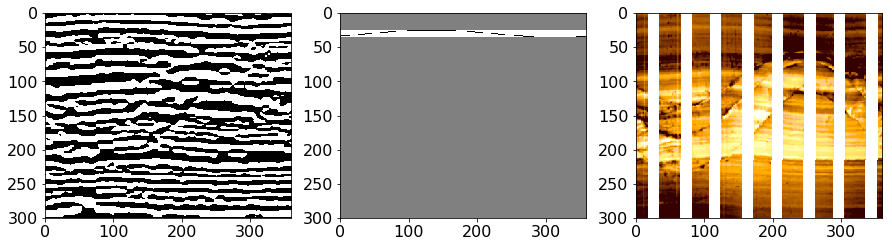

Short
cost 360
Am 5.067635614557107
Fq 1
Ag 1.8095826657511254
index 26
wImgArr 11 360


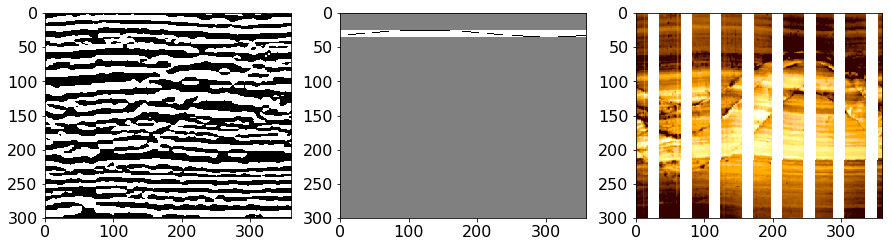

Short
cost 360
Am 5.211146715495537
Fq 1
Ag 1.7896238651102465
index 26
wImgArr 11 360


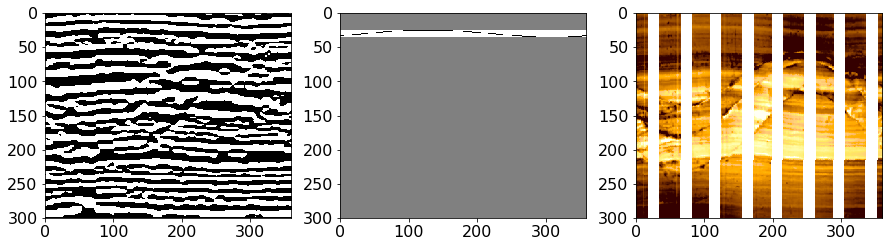

Short
cost 360
Am 6.851567864499886
Fq 1
Ag 1.8409857328145265
index 25
wImgArr 14 360


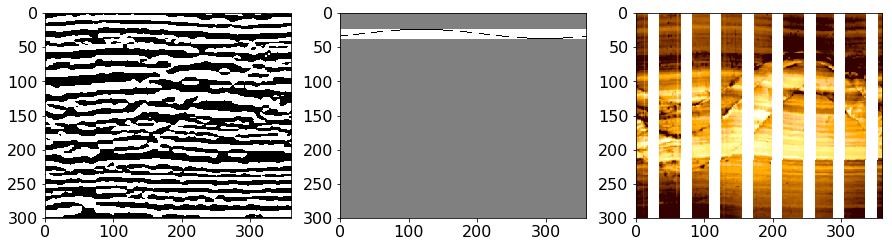

Short
cost 360
Am 5.737125200274662
Fq 1
Ag 1.7614557106889448
index 26
wImgArr 12 360


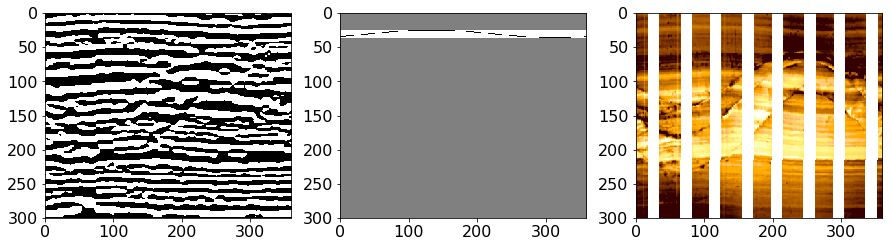

Short
cost 360
Am 5.060769054703593
Fq 1
Ag 1.8745250629434653
index 26
wImgArr 11 360


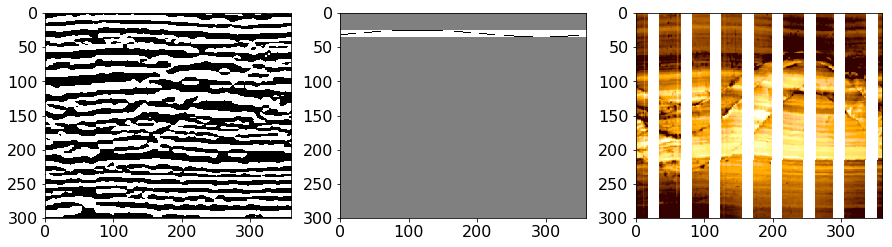

Short
cost 360
Am 6.6318379491874575
Fq 1
Ag 1.8716563668268864
index 25
wImgArr 14 360


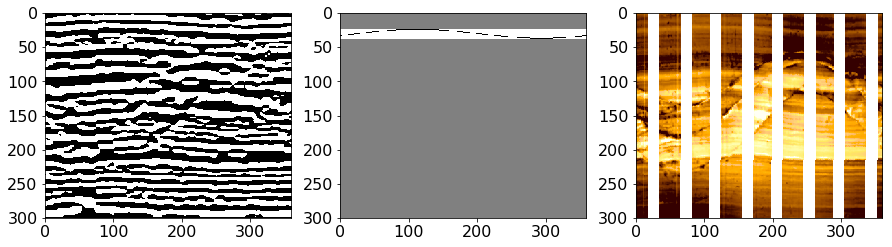

In [7]:

for idv in children:
    if idv["cost"] > 350:
        print(idv["type"])
        print('cost ' + str(idv["cost"]))
        print('Am ' + str(idv["aVal"]))
        print('Fq ' + str(idv["fqVal"]))
        print('Ag ' + str(idv["agVal"]))
        print('index ' + str(idv["index"]))
        print('wImgArr ' + str(idv["wImgArr"].shape[0]) + ' ' + str(idv["wImgArr"].shape[1]))
        base1 = None
        base2 = None
        outImg = None
        if idv["index"] == 0:
            base1 = idv["wImgArr"]
            base2 = np.ones((300 - idv["wImgArr"].shape[0],360)).astype(np.uint8)
            outImg = np.concatenate((base1, base2), axis=0)
        else:
            base1 = np.ones((idv["index"],360)).astype(np.uint8)
            base2 = np.ones((300 - (idv["index"] + idv["wImgArr"].shape[0]),360)).astype(np.uint8)
            outImg = np.concatenate((base1, idv["wImgArr"]), axis=0)
            outImg = np.concatenate((outImg, base2), axis=0)
            
        
        plt.rcParams.update({'font.size': 16})
        fig = plt.gcf()
        fig.set_size_inches(15, 15)
        plt.subplot(1, 3, 1)
        gray = plt.imshow(imgeo, cmap='gray', interpolation='none')
        # plt.imshow(idv["wImgArr"], cmap='gray', interpolation='none')
        plt.subplot(1, 3, 2)
        plt.imshow(outImg, cmap='gray', interpolation='none')
        plt.subplot(1, 3, 3)
        gray = plt.imshow(imgeoOrg)
        # plt.plot(idv["x"], idv["s"] )
        plt.show()
        

        


(1114, 360)


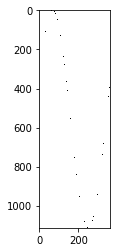

In [96]:
index = 1
print(imgsMtxLst[index]["wImgArr"].shape)
fig = plt.gcf()
plt.imshow(imgsMtxLst[index]["wImgArr"], cmap='gray', interpolation='none')
plt.show()

## Image Comparison

 Iteration 814
78
0


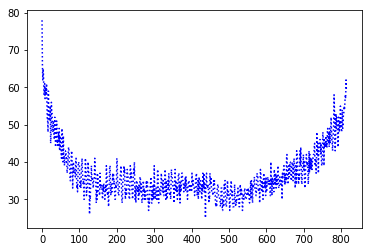

In [97]:
endFlag = True
baseImgLen = imgeo.shape[0]
waveImgLen = imgsMtxLst[index]["wImgArr"].shape[0]
Iterations = []
Costs = []
if waveImgLen <= baseImgLen:
    endFlag = False
    scanIndex = 0
    cost = 0
    bestCostIndex = 0
    while(endFlag == False):
        sys.stdout.write("\r Iteration " + str(scanIndex))
        sys.stdout.flush()
        imgDiff = imgsMtxLst[index]["wImgArr"] - imgeo[scanIndex:(waveImgLen + scanIndex)]
        mask = imgDiff != 0
        binMask = mask.astype(int)
        tmpCost = np.count_nonzero(binMask == 0)
        Iterations.append(scanIndex)
        Costs.append(tmpCost)
        if tmpCost > cost:
            cost = tmpCost
            bestCostIndex = scanIndex
            
        # print(cost)
        # plt.imshow(binMask, cmap='gray', interpolation='none')
        # plt.show()
        scanIndex = scanIndex + 1
        if (waveImgLen + scanIndex) > baseImgLen:
            endFlag =  True
    
    print('\n' + str(cost))
    print(bestCostIndex)
    plt.plot(np.squeeze(Iterations),
         np.squeeze(Costs),
         'b:')
    plt.show()
    
else:
    endFlag = False
    scanIndex = 0
    cost = 0
    bestCostIndex = 0
    while(endFlag == False):
        sys.stdout.write("\r Iteration " + str(scanIndex))
        sys.stdout.flush()
        imgDiff = imgsMtxLst[index]["wImgArr"][scanIndex:(baseImgLen + scanIndex)] - imgeo
        mask = imgDiff != 0
        binMask = mask.astype(int)
        tmpCost = np.count_nonzero(binMask == 0)
        Iterations.append(scanIndex)
        Costs.append(tmpCost)
        if tmpCost > cost:
            cost = tmpCost
            bestCostIndex = scanIndex
            
        # print(cost)
        # plt.imshow(binMask, cmap='gray', interpolation='none')
        # plt.show()
        scanIndex = scanIndex + 1
        if (baseImgLen + scanIndex) > waveImgLen:
            endFlag =  True
    
    print('\n' + str(cost))
    print(bestCostIndex)
    plt.plot(np.squeeze(Iterations),
         np.squeeze(Costs),
         'b:')
    plt.show()
      

In [98]:
costObj = waveCost(imgeo,imgsMtxLst[index]["wImgArr"])
print(costObj)
    

{'type': 'Extended', 'cost': 78, 'index': 0}


In [124]:
gopp = ga.pgenerator4Gop(N=N,d = 3)
gopp[0][0] = 0.4
gopp[0][1] = 0.5
gopp[0][2] = 0.1

print(gopp[0])

probOrderIndex = np.flip(np.argsort(gopp[0]), axis = -1)
opgSrt = np.flip(np.sort(gopp[0]), axis = -1)
comulativeGopp = np.cumsum(opgSrt, axis = -1)
print(probOrderIndex)
print(opgSrt)
print(comulativeGopp)
gopSelp = np.random.uniform(0,1,1)
print(gopSelp)
print(np.where(gopSelp <= comulativeGopp))
operator = probOrderIndex[np.where(gopSelp <= comulativeGopp)[0][0]]
print(operator)

[0.4 0.5 0.1]
[1 0 2]
[0.5 0.4 0.1]
[0.5 0.9 1. ]
[0.21844673]
(array([0, 1, 2]),)
1
